## Objetivos

Después de completar este laboratorio serás capaz de:

Realizar preprocesamiento básico de datos usando Scikit-Learn

Modelar una tarea de regresión utilizando Scikit-Learn

Entrenar un modelo Decision Tree Regressor

Ejecutar inferencia y evaluar la calidad de los modelos entrenados

<h2>Introducción</h2>

El conjunto de datos utilizado en esta sesión de ejercicios es un subconjunto del TLC Dataset, que es de acceso público (todos los derechos reservados por la Taxi & Limousine Commission (TLC) de la Ciudad de Nueva York).

La predicción del monto de la propina puede modelarse como un problema de regresión. Para entrenar el modelo puedes usar una parte del conjunto de datos de entrada, y los datos restantes pueden emplearse para evaluar la calidad del modelo entrenado.

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

En esta sección leerás el conjunto de datos en un dataframe de Pandas y visualizarás su contenido. También revisarás algunas estadísticas de los datos.

Nota: Un dataframe de Pandas es una estructura de datos tabular bidimensional, de tamaño mutable y potencialmente heterogénea. Para más información: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
.

In [2]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


Cada fila del conjunto de datos representa un viaje en taxi. Como se mostró arriba, cada fila tiene 13 variables. Una de las variables es tip_amount, que será la variable objetivo. Tu objetivo será entrenar un modelo que use las demás variables para predecir el valor de la variable tip_amount.
Para comprender un poco mejor el conjunto de datos, vamos a graficar la correlación de la variable objetivo frente a las variables de entrada.

<Axes: >

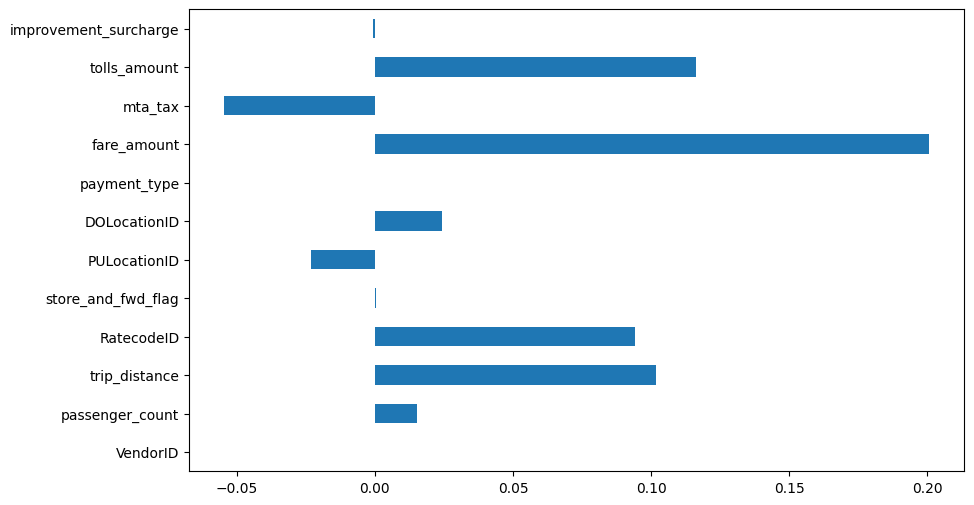

In [3]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

Esto nos muestra que las características de entrada payment_type, VendorID, store_and_fwd_flag e improvement_surcharge tienen poca o ninguna correlación con la variable objetivo.

Ahora prepararás los datos para el entrenamiento aplicando normalización a las características de entrada.

In [4]:
# extract the labels from the dataframe
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

División del conjunto de datos en entrenamiento/prueba

Ahora que el conjunto de datos está listo para construir los modelos de clasificación, primero necesitas dividir el conjunto de datos preprocesado en un subconjunto que se usará para entrenar el modelo (el train set) y un subconjunto que se usará para evaluar la calidad del modelo (el test set)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Construir un modelo Decision Tree Regressor con Scikit-Learn
Los Árboles de Regresión se implementan usando DecisionTreeRegressor.

Los parámetros importantes del modelo son:

criterion: La función utilizada para medir el error; usamos 'squared_error'.

max_depth: La profundidad máxima permitida para el árbol; usamos 8.

In [6]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8,
                               random_state=35)

Ahora entrenemos nuestro modelo usando el método fit del objeto DecisionTreeRegressor, proporcionando nuestros datos de entrenamiento.

In [7]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

Evaluar los modelos Decision Tree Regressor de Scikit-Learn y Snap ML
Para evaluar nuestro conjunto de datos, utilizaremos el método score del objeto DecisionTreeRegressor, proporcionando nuestros datos de prueba.
Este número es el valor R², que indica el coeficiente de determinación.

También evaluaremos el Error Cuadrático Medio (Mean Squared Error, MSE) de la salida de regresión con respecto a los valores objetivo del conjunto de prueba.

De un buen modelo de regresión se esperan valores R² altos y MSE bajos.

In [8]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028


P1. ¿Qué pasa si cambiamos max_depth a 12? ¿Cómo se verían afectados el MSE y el R²?

Solución:
Se observa que el MSE aumenta al incrementar la profundidad máxima (max_depth) del árbol. Esto puede deberse a que el modelo obtiene un número excesivo de parámetros, lo que provoca sobreajuste (overfitting) a los datos de entrenamiento y empeora su desempeño en los datos de prueba.

Otra observación importante es que el modelo puede dar un valor negativo de R². Esto indica nuevamente que el modelo de predicción hace un trabajo muy pobre al predecir los valores en el conjunto de prueba.

P2. Identifica las 3 características con mayor efecto sobre tip_amount.

In [9]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending=False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

Como es evidente a partir de la salida, fare_amount, toll_amount y trip_distance son las principales características que afectan el monto de la propina (tip_amount), lo cual tiene sentido lógico.

P3. Dado que identificamos 4 características que no están correlacionadas con la variable objetivo, intenta eliminar estas variables del conjunto de entrada y observa el efecto en el valor del MSE y R².

In [10]:
raw_data = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)

# Execute all the cells of the lab after modifying the raw data.

Los valores de MSE y R² no cambian de manera significativa, lo que muestra que estos parámetros tienen un efecto mínimo en el resultado final de la regresión.

P4. Verifica el efecto de disminuir el parámetro max_depth a 4 en los valores de R² y MSE.

Notarás que el valor de MSE disminuye y el valor de R² aumenta, lo que significa que elegir max_depth = 4 podría ser más adecuado para este conjunto de datos.

Cuadernillo terminado